# Perplexity Analysis

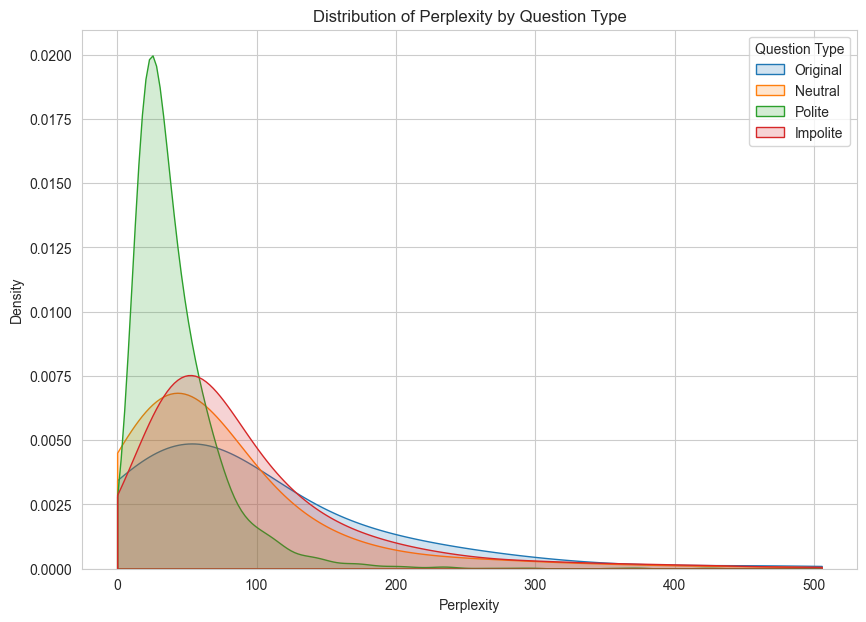

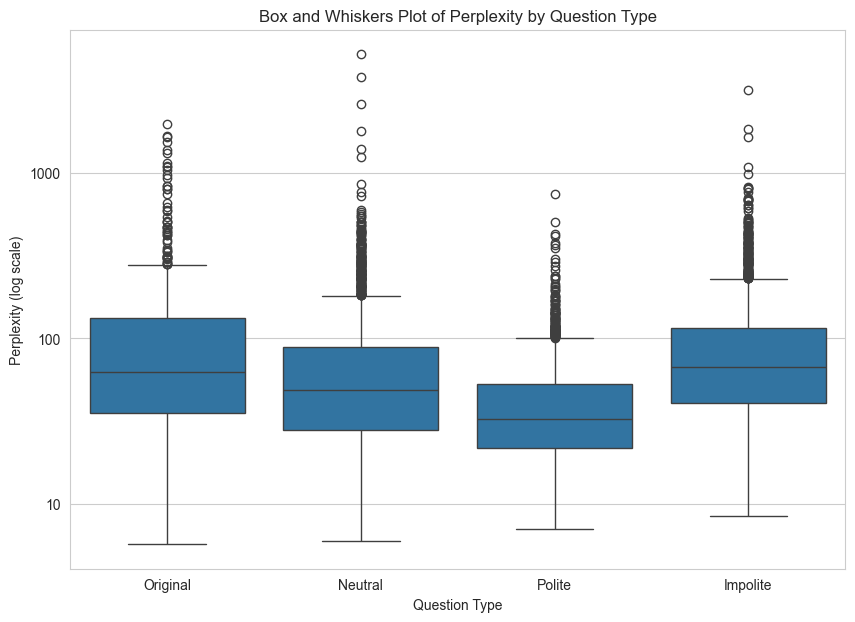

In [192]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('model_outputs/perplexity_results.json', 'r') as file:
    data = json.load(file)

# enumerate question types
question_types = [
    'question',
    'neutral_question_1',
    'neutral_question_2',
    'neutral_question_3',
    'polite_question_1',
    'polite_question_2',
    'polite_question_3',
    'impolite_question_1',
    'impolite_question_2',
    'impolite_question_3'
]

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in question_types:
        if question_type in entry and 'perplexity' in entry[question_type]:
            if question_type == 'question':
                name = 'Original'
            else:
                name = question_type.split('_')[0].capitalize()
            records.append({
                'Question Type': name,
                'Perplexity': entry[question_type]['perplexity']
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.2,
        clip=(0, df['Perplexity'].quantile(0.99))
    )
plt.title('Distribution of Perplexity by Question Type')
plt.xlabel('Perplexity')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

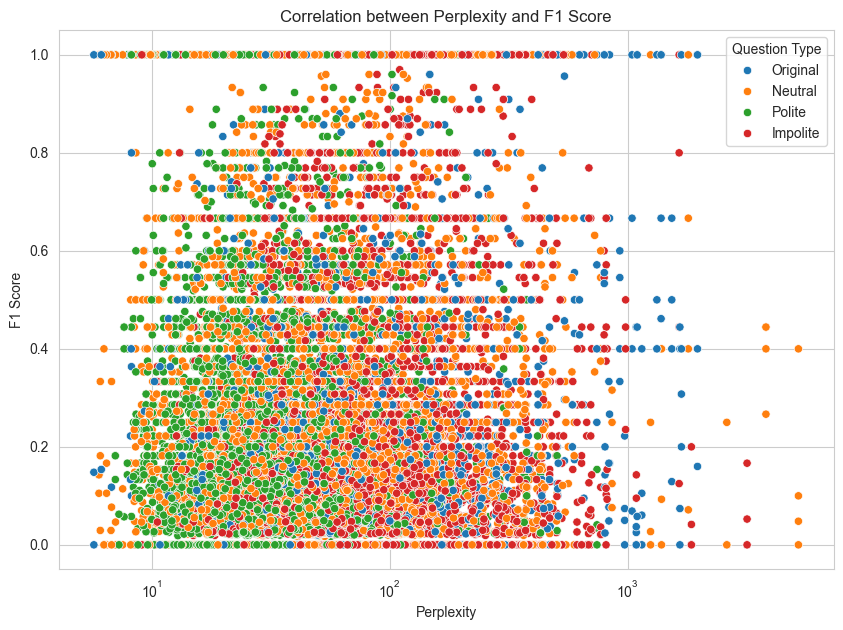

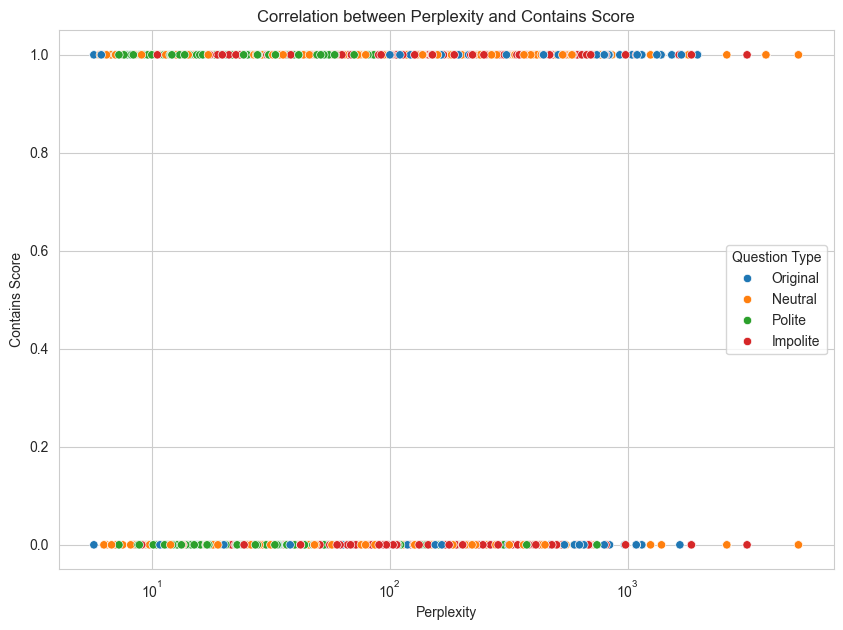

Correlation coefficient between perplexity and contains score: -0.005932078030936148
Correlation coefficient between perplexity and F1 score: 0.00044755356910513357


In [193]:
models = ['4o-mini', 'mistral', 'falcon', 'llama']
dataframes = [pd.read_csv(f'model_outputs/{model}_evaluation_results.csv') for model in models]
# Stack the dataframes
evaluation_df = pd.concat(dataframes, keys=models, names=['Model', 'Row'])

# Reset index to make 'Model' a column
evaluation_df = evaluation_df.reset_index(level='Model').reset_index(drop=True)

# Load the JSON data
with open('model_outputs/perplexity_results.json', 'r') as file:
    perplexity_data = json.load(file)

# Prepare the perplexity data for merging
perplexity_records = []
for entry in perplexity_data:
    for question_type in question_types:
        if question_type in entry and 'perplexity' in entry[question_type]:
            if question_type == 'question':
                answer_type = "question_answer"
            else:
                answer_type = question_type.replace('question', 'answer')
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': answer_type,
                'perplexity': entry[question_type]['perplexity'],
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

def detect_type(text):
    if text == 'question_answer':
        return 'Original'
    return text[: -len("_answer_X")].capitalize()

merged_df['answer_type'] = merged_df['answer_type'].apply(detect_type)

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity and F1 Score')
plt.xlabel('Perplexity')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity and Contains Score')
plt.xlabel('Perplexity')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity and contains score
correlation = merged_df[['perplexity', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and contains score: {correlation}')

# Calculate correlation coefficient between perplexity and F1 score
correlation = merged_df[['perplexity', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and F1 score: {correlation}')

# Perplexity Per Token

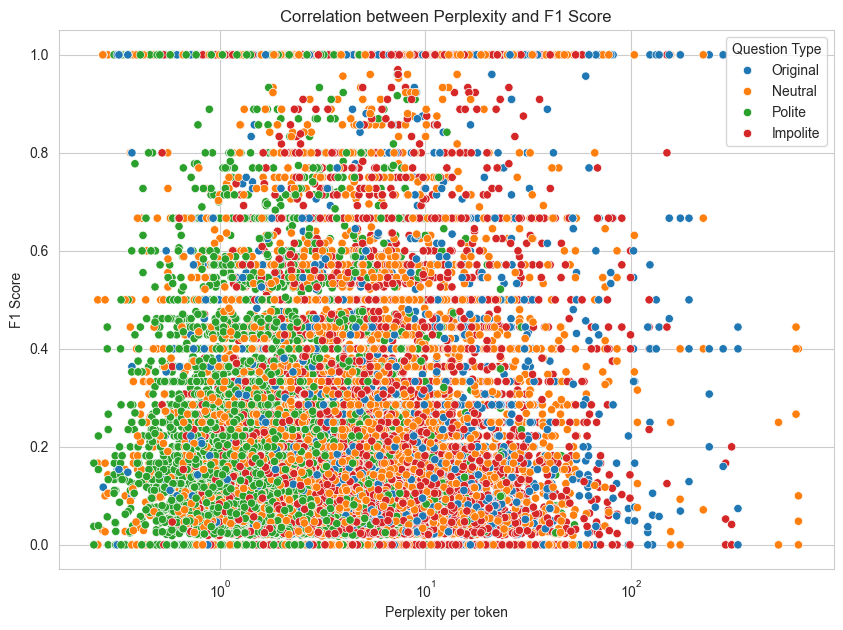

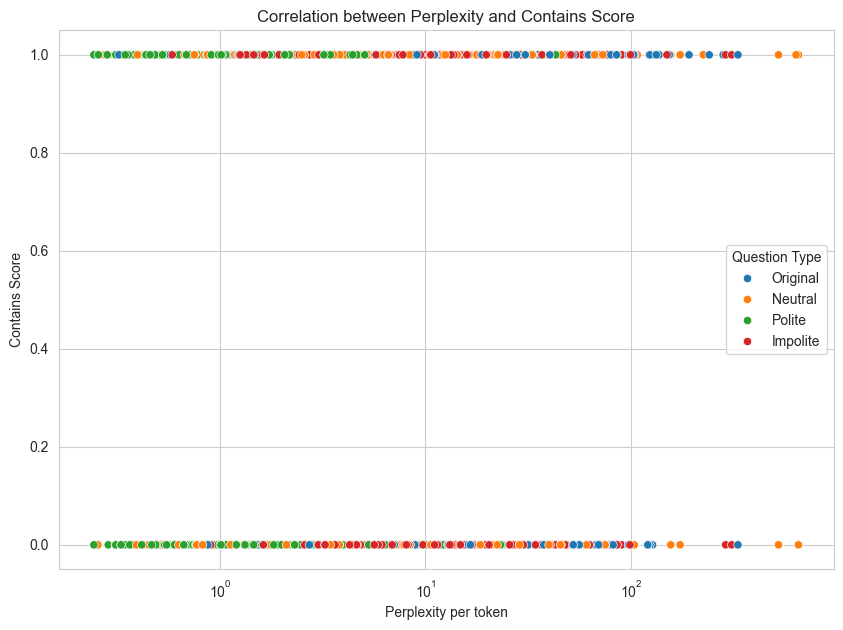

Correlation coefficient between perplexity and contains score: -0.006164368019649821
Correlation coefficient between perplexity and F1 score: 0.0011171062041725206


In [194]:
models = ['4o-mini', 'mistral', 'falcon', 'llama']
dataframes = [pd.read_csv(f'model_outputs/{model}_evaluation_results.csv') for model in models]
# Stack the dataframes
evaluation_df = pd.concat(dataframes, keys=models, names=['Model', 'Row'])

# Reset index to make 'Model' a column
evaluation_df = evaluation_df.reset_index(level='Model').reset_index(drop=True)

# Load the JSON data
with open('model_outputs/perplexity_results.json', 'r') as file:
    perplexity_data = json.load(file)

# Prepare the perplexity data for merging
perplexity_records = []
for entry in data:
    for question_type in question_types:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            if question_type == 'question':
                answer_type = "question_answer"
            else:
                answer_type = question_type.replace('question', 'answer')
            perplexity_records.append({
                'id': entry.get('id', ''),
                'answer_type': answer_type,
                'perplexity_per_token': perplexity_per_token,
                'question': entry[question_type].get('question', '')
            })

# Convert to DataFrame
perplexity_df = pd.DataFrame(perplexity_records)

# Merge the evaluation data with the perplexity data
merged_df = pd.merge(evaluation_df, perplexity_df, on=['question', 'answer_type'])

def detect_type(text):
    if text == 'question_answer':
        return 'Original'
    return text[: -len("_answer_X")].capitalize()

merged_df['answer_type'] = merged_df['answer_type'].apply(detect_type)

# Set plot style
sns.set_style('whitegrid')

# Plot correlation between perplexity and F1 score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='F1', hue='answer_type')
plt.title('Correlation between Perplexity and F1 Score')
plt.xlabel('Perplexity per token')
plt.ylabel('F1 Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Plot correlation between perplexity and contains score
plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='perplexity_per_token', y='contains', hue='answer_type')
plt.title('Correlation between Perplexity and Contains Score')
plt.xlabel('Perplexity per token')
plt.ylabel('Contains Score')
plt.xscale('log')
plt.legend(title='Question Type')
plt.show()

# Calculate the correlation coefficient between perplexity and contains score
correlation = merged_df[['perplexity_per_token', 'contains']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and contains score: {correlation}')

# Calculate correlation coefficient between perplexity and F1 score
correlation = merged_df[['perplexity_per_token', 'F1']].corr(method='pearson').iloc[0, 1]
print(f'Correlation coefficient between perplexity and F1 score: {correlation}')

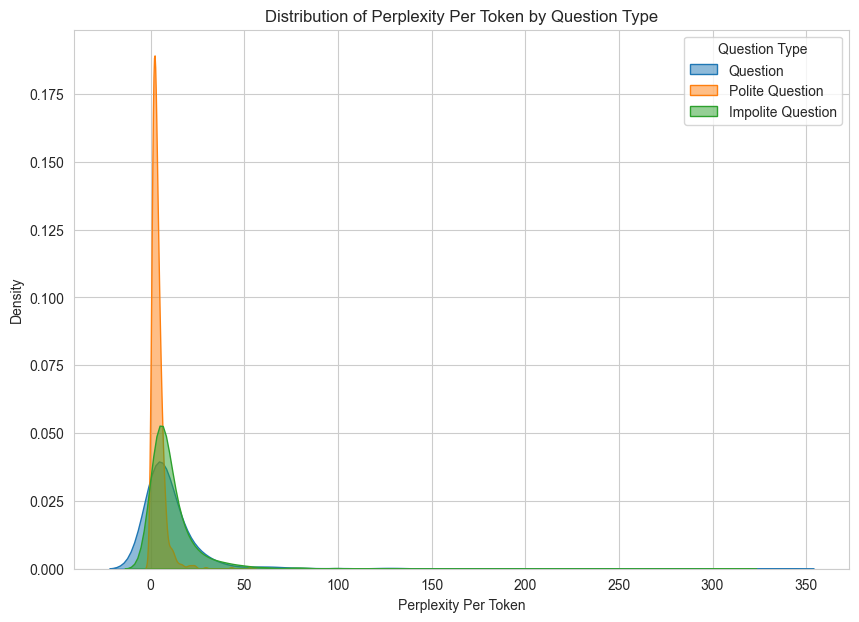

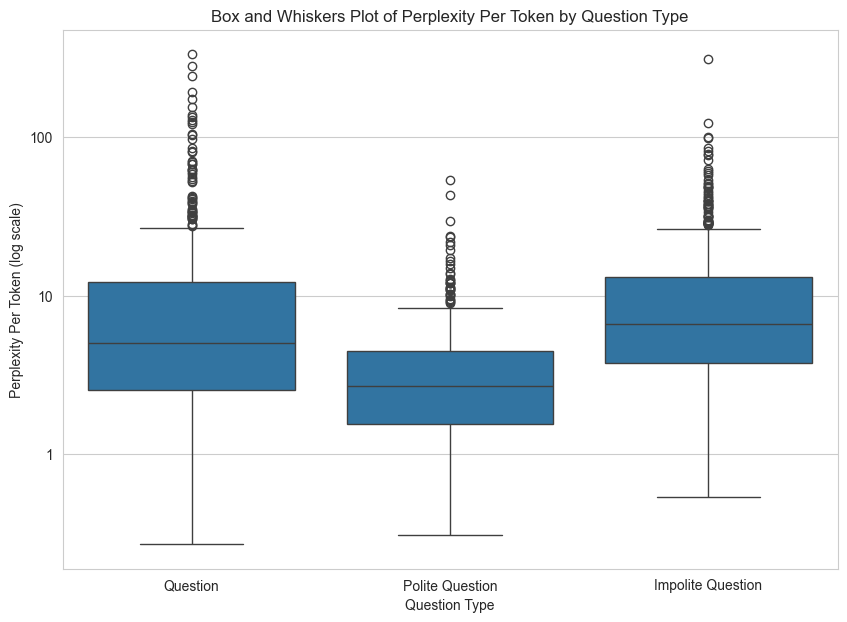

In [195]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON data
with open('perplexity_results.json', 'r') as file:
    data = json.load(file)

# Prepare the data for plotting
records = []
for entry in data:
    for question_type in ['question', 'polite_question', 'impolite_question']:
        if question_type in entry and 'perplexity' in entry[question_type]:
            perplexity = entry[question_type]['perplexity']
            num_tokens = len(entry[question_type]['tokens'])
            perplexity_per_token = perplexity / num_tokens
            records.append({
                'Question Type': question_type.replace('_', ' ').title(),
                'Perplexity Per Token': perplexity_per_token,
                'num_tokens': num_tokens
            })

# Convert to DataFrame
df = pd.DataFrame(records)

# Set plot style
sns.set_style('whitegrid')

# Plot the distribution of perplexity per token by question type
plt.figure(figsize=(10,7))
for question_type in df['Question Type'].unique():
    sns.kdeplot(
        data=df[df['Question Type'] == question_type],
        x='Perplexity Per Token',
        label=question_type,
        common_norm=False,
        fill=True,
        alpha=0.5
    )
plt.title('Distribution of Perplexity Per Token by Question Type')
plt.xlabel('Perplexity Per Token')
plt.ylabel('Density')
plt.legend(title='Question Type')
plt.show()

import matplotlib.ticker as ticker

# Plot the box and whiskers plot of perplexity per token by question type with a logarithmic scale
plt.figure(figsize=(10,7))
sns.boxplot(x='Question Type', y='Perplexity Per Token', data=df)
plt.yscale('log')
plt.title('Box and Whiskers Plot of Perplexity Per Token by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Perplexity Per Token (log scale)')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

# Politeness Evaluation

In [196]:
models = ['4o-mini', 'mistral', 'falcon', 'llama']
dataframes = [pd.read_csv(f'model_outputs/{model}_evaluation_results.csv') for model in models]
# Stack the dataframes
stacked_df = pd.concat(dataframes, keys=models, names=['Model', 'Row'])

# Reset index to make 'Model' a column
stacked_df = stacked_df.reset_index(level='Model').reset_index(drop=True)

In [197]:
def detect_type(text):
        if text == 'question_answer':
            return 'Original'
        return text[: -len("_answer_X")].capitalize()

stacked_df['answer_type'] = stacked_df['answer_type'].apply(detect_type)

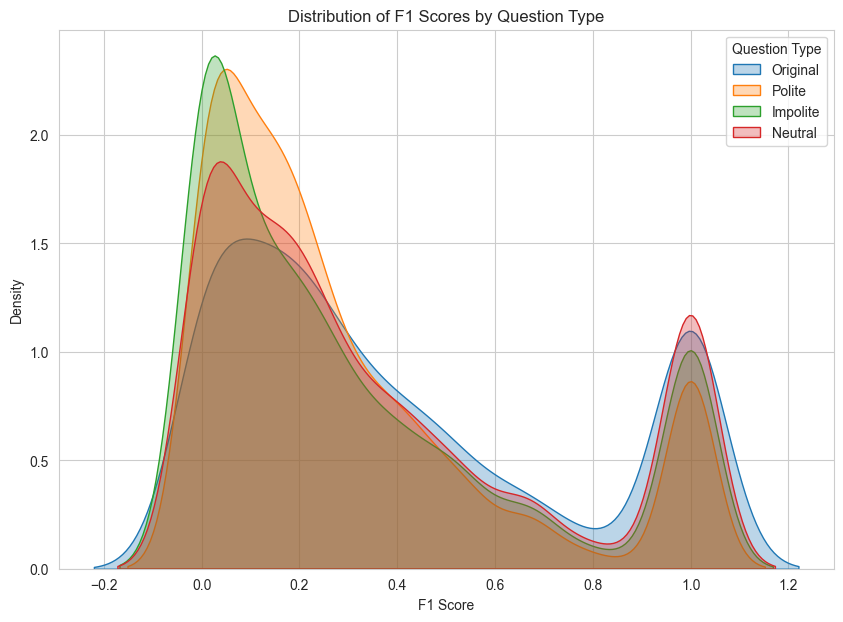

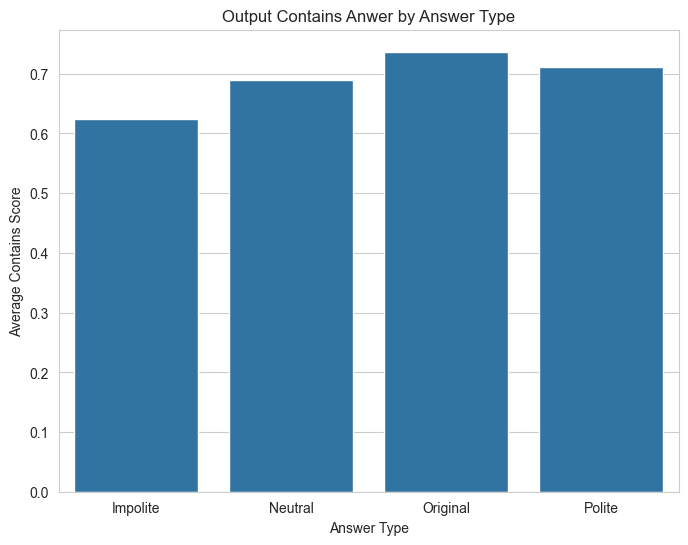

,answer_type,contains
0,Impolite,0.624156
1,Neutral,0.689319
2,Original,0.736961
3,Polite,0.711879


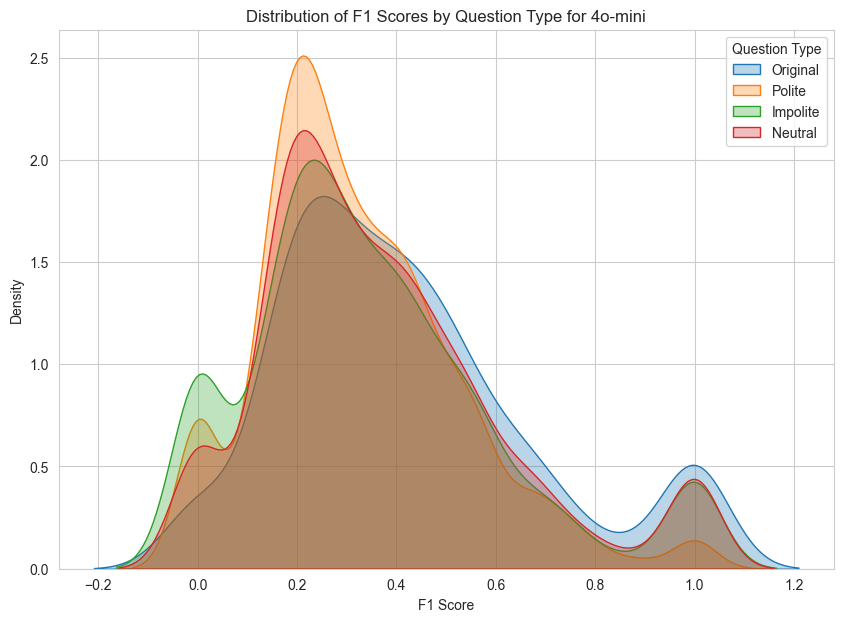

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/661241718.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains'] = df['contains'].astype(int)


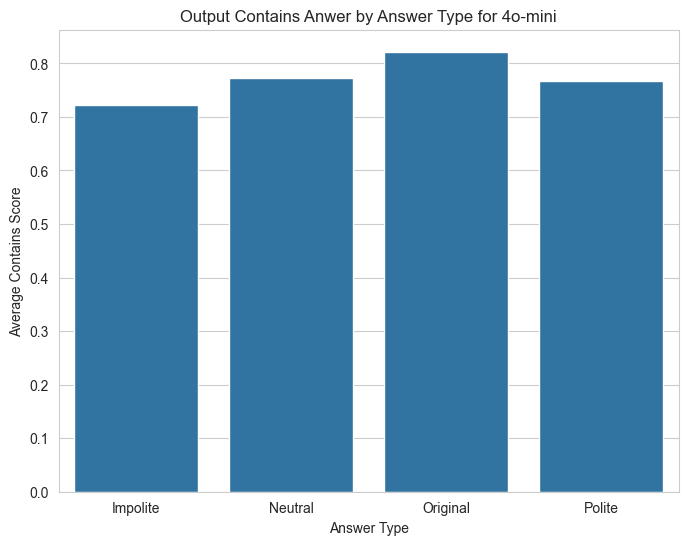

,answer_type,contains
0,Impolite,0.723054
1,Neutral,0.772455
2,Original,0.821856
3,Polite,0.767964


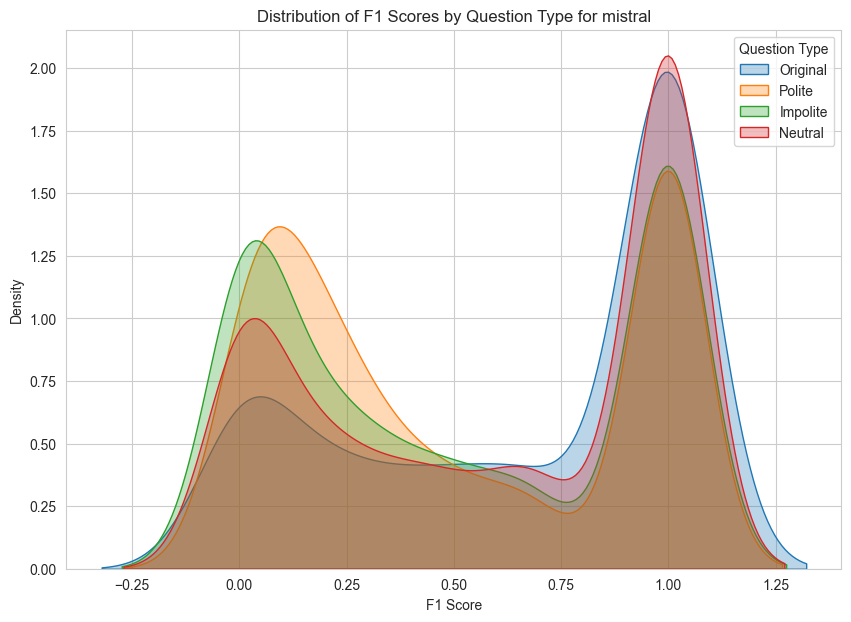

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/661241718.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains'] = df['contains'].astype(int)


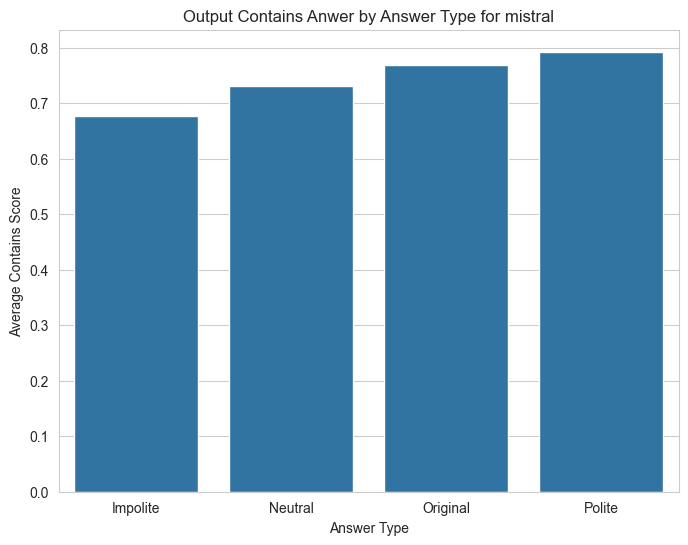

,answer_type,contains
0,Impolite,0.677323
1,Neutral,0.730635
2,Original,0.768421
3,Polite,0.792914


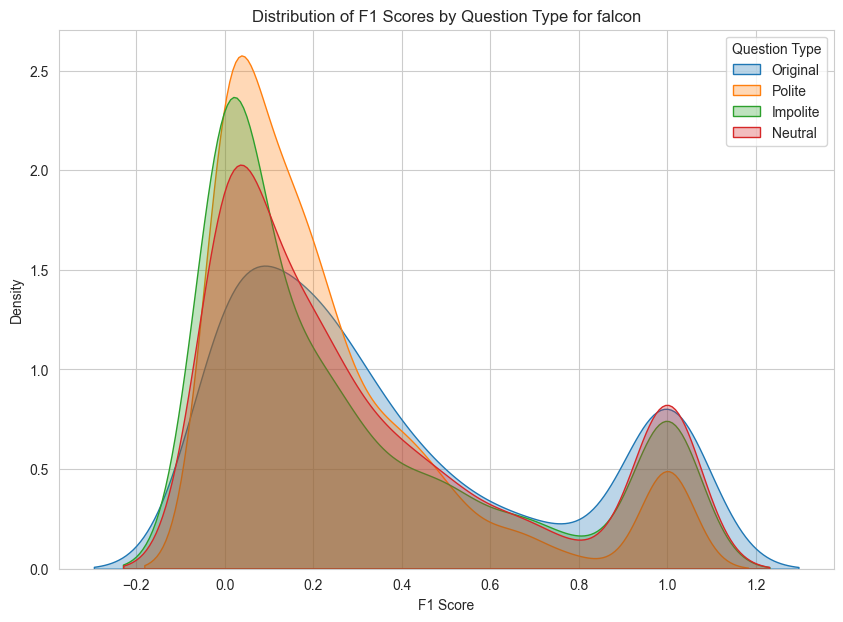

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/661241718.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains'] = df['contains'].astype(int)


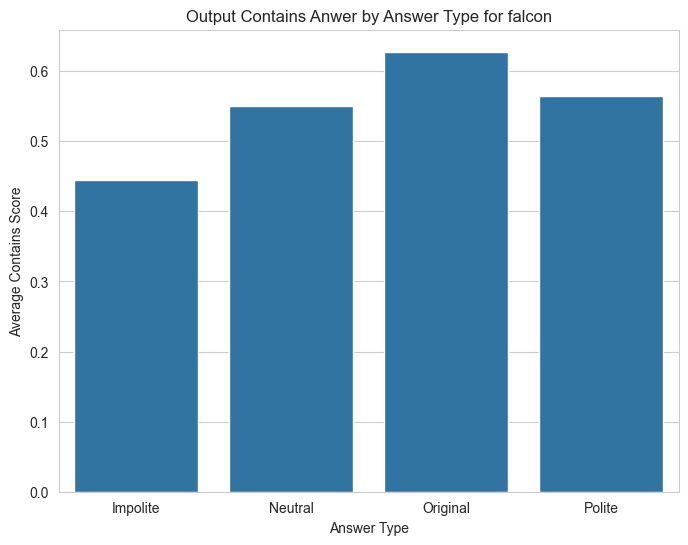

,answer_type,contains
0,Impolite,0.444389
1,Neutral,0.550775
2,Original,0.627628
3,Polite,0.563872


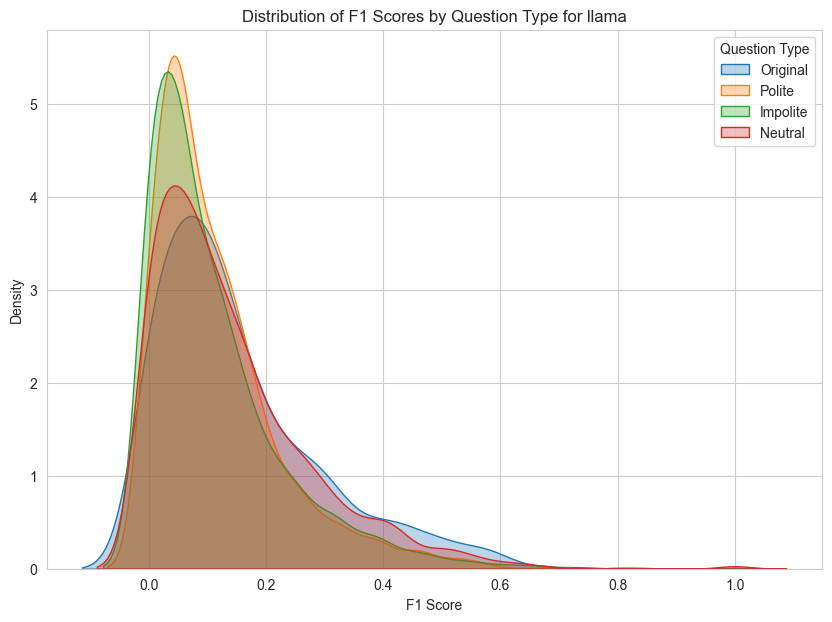

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/661241718.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains'] = df['contains'].astype(int)


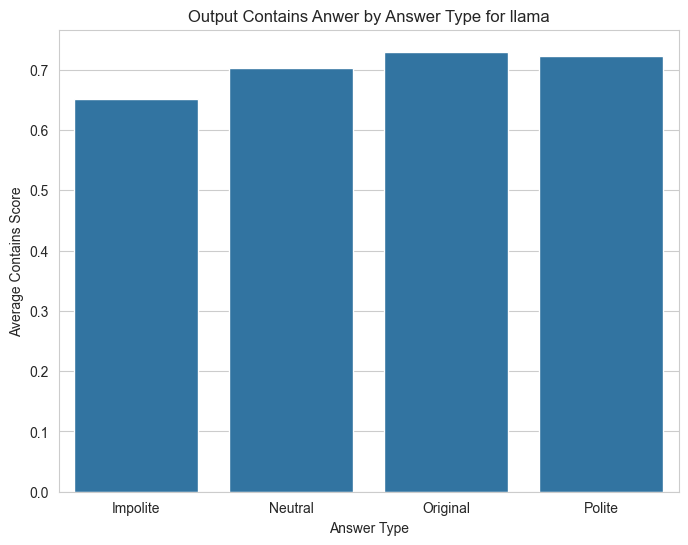

,answer_type,contains
0,Impolite,0.651303
1,Neutral,0.703148
2,Original,0.729730
3,Polite,0.722777


In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
# df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')
def plot_stats(df, model_name=None):
    # Set plot style
    sns.set_style('whitegrid')

    # Plot overlapping distributions of F1 scores one at a time
    plt.figure(figsize=(10,7))

    answer_type_mapping = {
        'Original': 'Original',
        'Polite': 'Polite',
        'Impolite': 'Impolite',
        'Neutral': 'Neutral'
    }

    for question_type, label in answer_type_mapping.items():
        subset = df[df['answer_type'] == question_type]
        sns.kdeplot(
            data=subset,
            x='F1',
            label=label,
            common_norm=False,
            fill=True,
            alpha=0.3
        )
    if model_name:
        plt.title(f'Distribution of F1 Scores by Question Type for {model_name}')
    else:
        plt.title('Distribution of F1 Scores by Question Type')
    plt.xlabel('F1 Score')
    plt.ylabel('Density')
    plt.legend(title='Question Type')
    plt.show()

    # Convert 'contains' column to numeric if necessary
    df['contains'] = df['contains'].astype(int)

    # Group data by 'answer_type' and calculate mean scores
    grouped = df.groupby('answer_type', as_index=False).agg({
        'contains': 'mean'
    })

    # Set plot style
    sns.set_style('whitegrid')

    # Plot Contains scores
    plt.figure(figsize=(8,6))
    sns.barplot(x='answer_type', y='contains', data=grouped)
    if model_name:
        plt.title(f'Output Contains Anwer by Answer Type for {model_name}')
    else:
        plt.title('Output Contains Anwer by Answer Type')
    plt.xlabel('Answer Type')
    plt.ylabel('Average Contains Score')
    plt.show()
    return grouped

grouped = plot_stats(stacked_df)
display(grouped)
for model in models:
    grouped = plot_stats(stacked_df[stacked_df['Model'] == model], model)
    display(grouped)

# Correctness Variations

In [199]:
models = ['4o-mini', 'mistral', 'falcon', 'llama']
dataframes = [pd.read_csv(f'model_outputs/{model}_evaluation_results.csv') for model in models]
# Stack the dataframes
stacked_df = pd.concat(dataframes, keys=models, names=['Model', 'Row'])

# Reset index to make 'Model' a column
stacked_df = stacked_df.reset_index(level='Model').reset_index(drop=True)
stacked_df['model-id'] = stacked_df['Model'] + '-' + stacked_df['id']

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


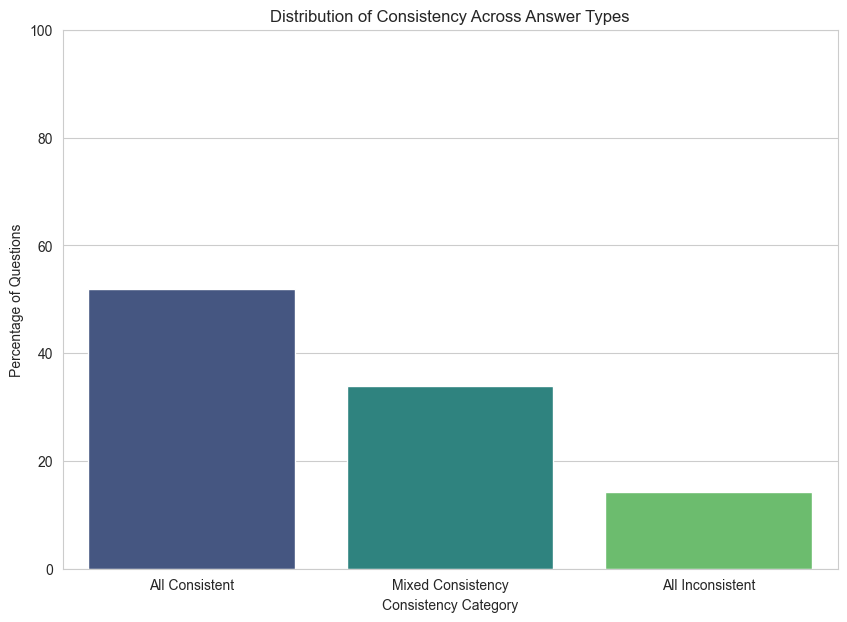

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


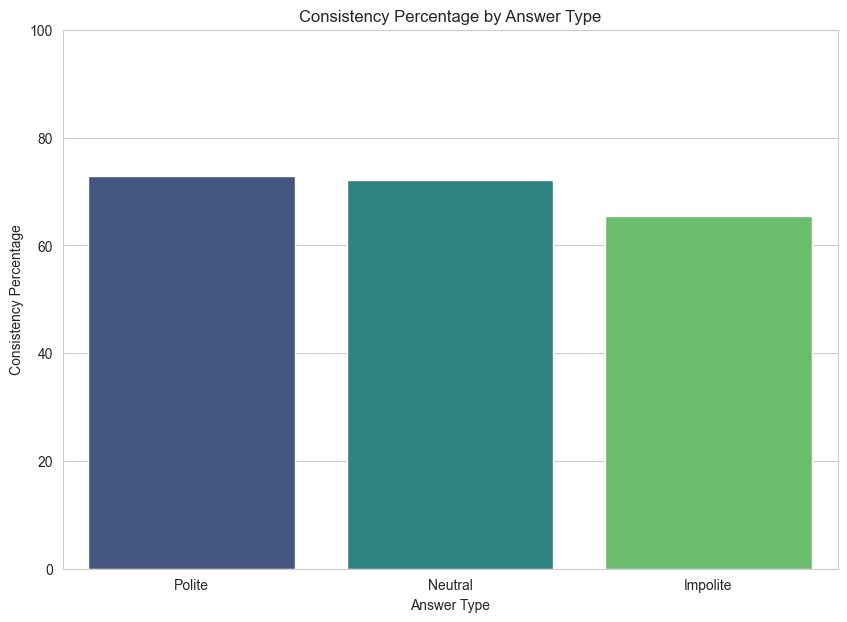

Consistency
All Consistent       51.946108
Mixed Consistency    33.869760
All Inconsistent     14.184132
Name: count, dtype: float64

,Answer Type,Consistency Percentage
0,Polite,72.904192
1,Neutral,72.043413
2,Impolite,65.456587


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


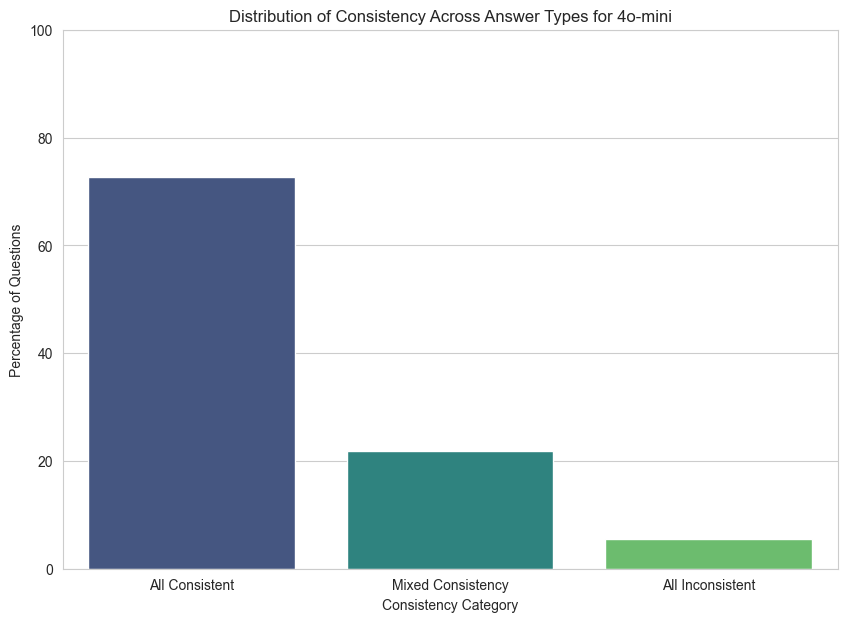

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


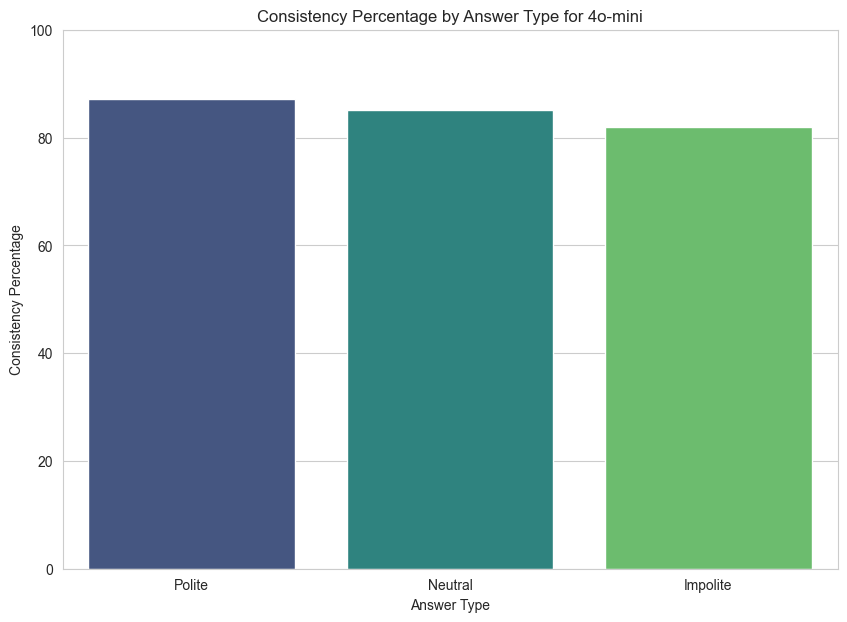

Consistency
All Consistent       72.604790
Mixed Consistency    21.856287
All Inconsistent      5.538922
Name: count, dtype: float64

,Answer Type,Consistency Percentage
0,Polite,87.125749
1,Neutral,85.029940
2,Impolite,81.886228


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


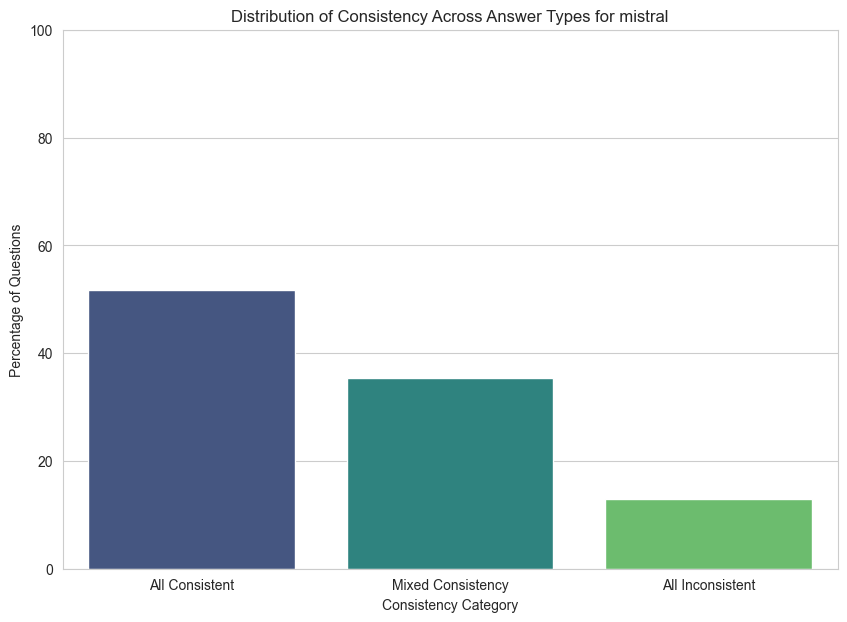

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


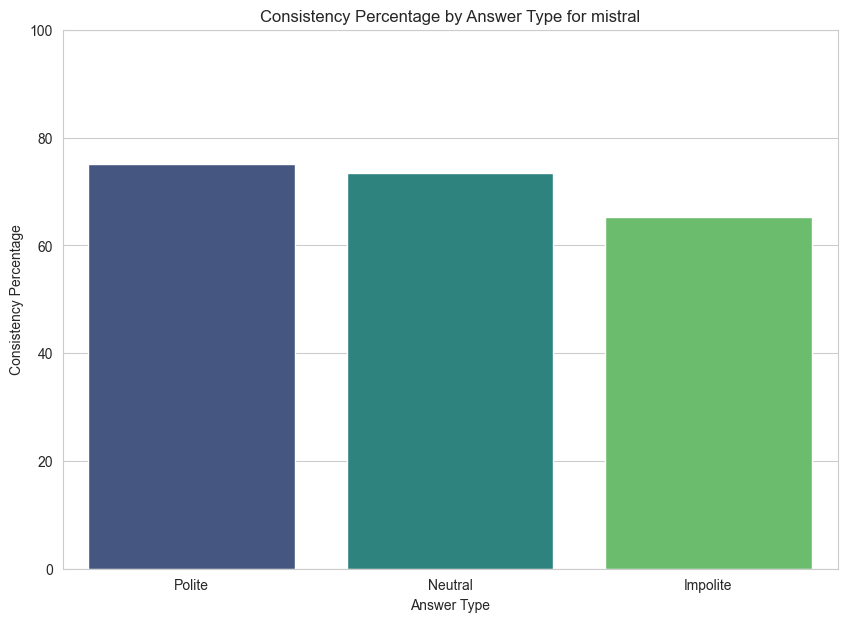

Consistency
All Consistent       51.646707
Mixed Consistency    35.329341
All Inconsistent     13.023952
Name: count, dtype: float64

,Answer Type,Consistency Percentage
0,Polite,75.000000
1,Neutral,73.353293
2,Impolite,65.269461


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


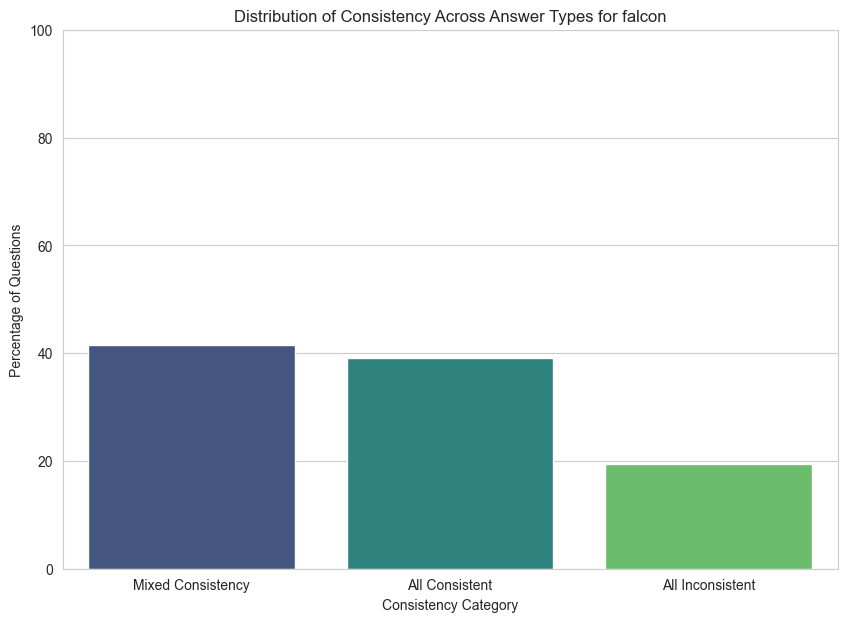

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


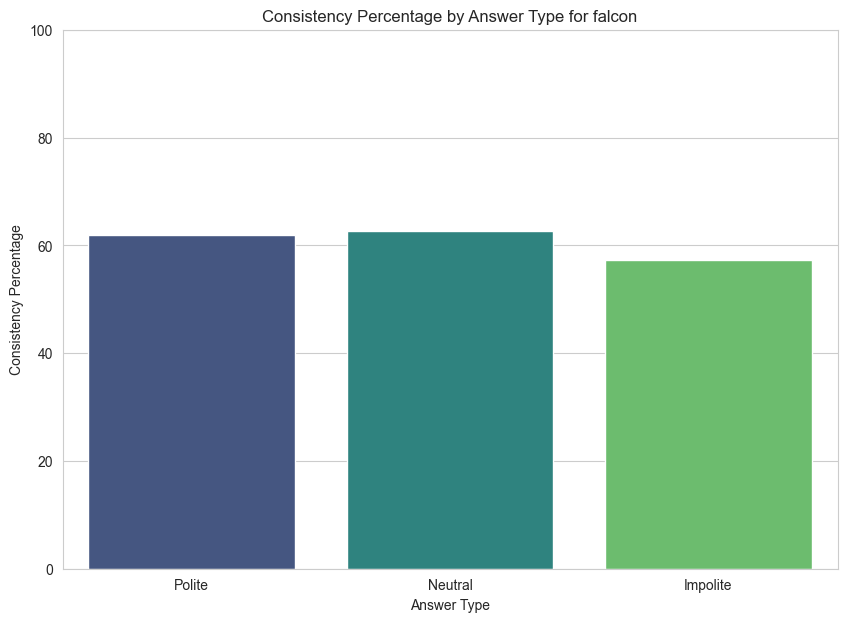

Consistency
Mixed Consistency    41.467066
All Consistent       39.071856
All Inconsistent     19.461078
Name: count, dtype: float64

,Answer Type,Consistency Percentage
0,Polite,61.826347
1,Neutral,62.574850
2,Impolite,57.185629


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')


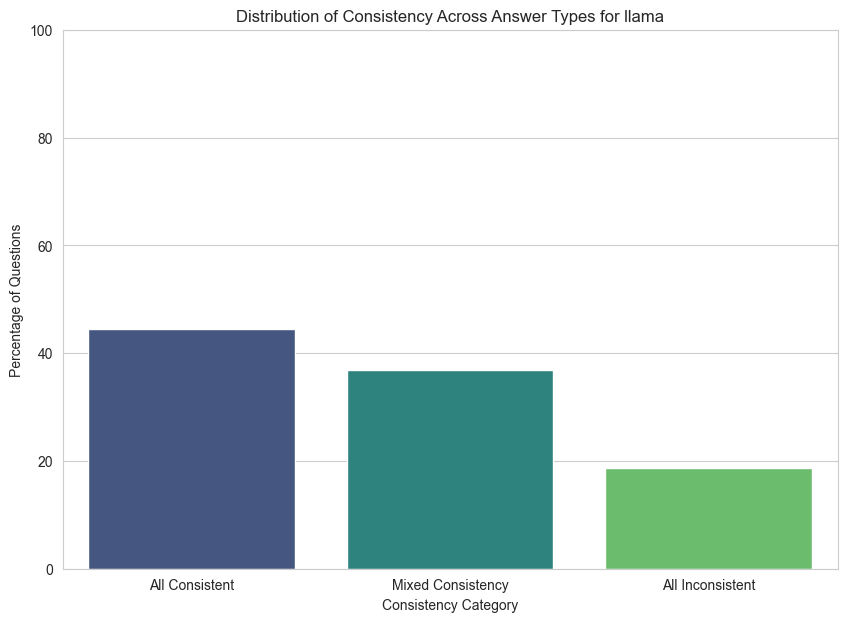

/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1841246067.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')


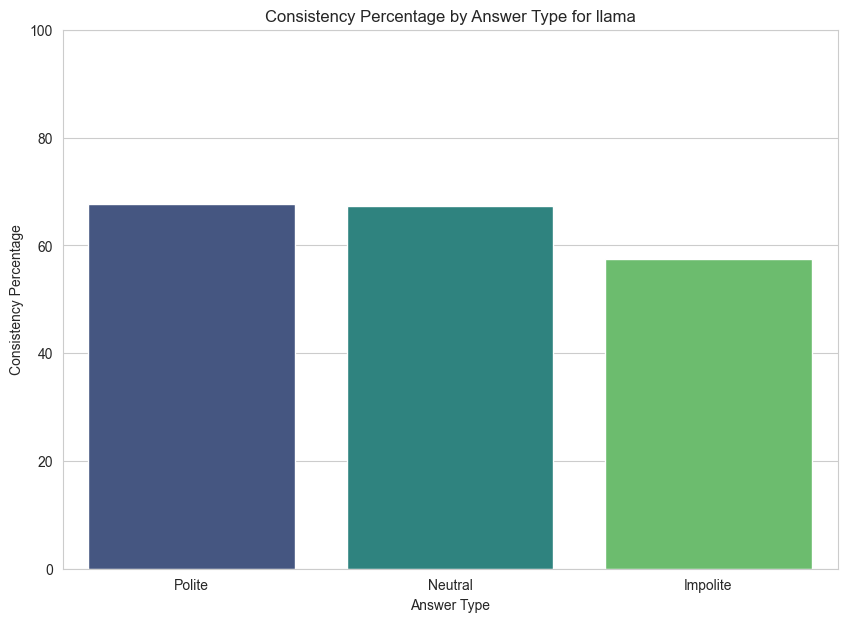

Consistency
All Consistent       44.461078
Mixed Consistency    36.826347
All Inconsistent     18.712575
Name: count, dtype: float64

,Answer Type,Consistency Percentage
0,Polite,67.664671
1,Neutral,67.215569
2,Impolite,57.485030


In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
def plot_variations(df, model_name=None):
    # Pivot the data to have one row per question with columns for each answer type
    pivot_df = df.pivot_table(index='model-id', columns='answer_type', values='contains')

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Load the data
    df = pivot_df

    # Define a function to categorize the consistency of answers
    def categorize_consistency(row):
        question_answer = row['question_answer']
        polite_answers = [row['polite_answer_1'], row['polite_answer_2'], row['polite_answer_3']]
        neutral_answers = [row['neutral_answer_1'], row['neutral_answer_2'], row['neutral_answer_3']]
        impolite_answers = [row['impolite_answer_1'], row['impolite_answer_2'], row['impolite_answer_3']]
        
        # Check consistency within each answer type
        polite_consistent = all(answer == question_answer for answer in polite_answers)
        neutral_consistent = all(answer == question_answer for answer in neutral_answers)
        impolite_consistent = all(answer == question_answer for answer in impolite_answers)
        
        # Determine the overall consistency
        if polite_consistent and neutral_consistent and impolite_consistent:
            return 'All Consistent'
        elif not polite_consistent and not neutral_consistent and not impolite_consistent:
            return 'All Inconsistent'
        else:
            return 'Mixed Consistency'

    # Apply the function to categorize each row
    df['Consistency'] = df.apply(categorize_consistency, axis=1)

    # Calculate consistency for each type
    df['Polite Consistent'] = df.apply(lambda row: all(row[f'polite_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)
    df['Neutral Consistent'] = df.apply(lambda row: all(row[f'neutral_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)
    df['Impolite Consistent'] = df.apply(lambda row: all(row[f'impolite_answer_{i}'] == row['question_answer'] for i in range(1, 4)), axis=1)

    # Count the number of rows in each consistency category
    consistency_counts = df['Consistency'].value_counts()

    # Calculate the percentage of consistency for each type
    polite_consistency_percentage = df['Polite Consistent'].mean() * 100
    neutral_consistency_percentage = df['Neutral Consistent'].mean() * 100
    impolite_consistency_percentage = df['Impolite Consistent'].mean() * 100

    # Calculate the percentage for each consistency category
    consistency_percentages = (consistency_counts / consistency_counts.sum()) * 100

    # Plot the distribution of consistency categories as percentages
    plt.figure(figsize=(10, 7))
    sns.barplot(x=consistency_percentages.index, y=consistency_percentages.values, palette='viridis')
    if model_name:
        plt.title(f'Distribution of Consistency Across Answer Types for {model_name}')
    else:
        plt.title('Distribution of Consistency Across Answer Types')
    plt.xlabel('Consistency Category')
    plt.ylabel('Percentage of Questions')
    plt.ylim(0, 100)  # Set y-axis limit to 100%
    plt.show()

    # Plot the consistency percentages for each type
    consistency_percentages_df = pd.DataFrame({
        'Answer Type': ['Polite', 'Neutral', 'Impolite'],
        'Consistency Percentage': [polite_consistency_percentage, neutral_consistency_percentage, impolite_consistency_percentage]
    })

    plt.figure(figsize=(10, 7))
    sns.barplot(x='Answer Type', y='Consistency Percentage', data=consistency_percentages_df, palette='viridis')
    if model_name:
        plt.title(f'Consistency Percentage by Answer Type for {model_name}')
    else:
        plt.title('Consistency Percentage by Answer Type')
    plt.xlabel('Answer Type')
    plt.ylabel('Consistency Percentage')
    plt.ylim(0, 100)  # Set y-axis limit to 100%
    plt.show()

    # Print the percentages for each consistency category
    display(consistency_percentages)

    # Print the consistency percentages for each type
    display(consistency_percentages_df)
plot_variations(stacked_df)
for model in models:
    plot_variations(stacked_df[stacked_df['Model'] == model], model)

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to categorize consistency for each type
def categorize_consistency(row, answer_prefix):
    answers = [row[f'{answer_prefix}_answer_{i}'] for i in range(1, 4)]
    if all(answer is True for answer in answers):
        return 'Consistently Right'
    elif all(answer is False for answer in answers):
        return 'Consistently Wrong'
    else:
        return 'Mixed Consistency'

def plot_q_consistency(df, model_name=None):
    print("FOR MODEL ", model_name)
    # Apply the function to categorize each row
    df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
    df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')
    df['Impolite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='impolite')

    # Count the number of questions in each consistency category for each type
    polite_consistency_counts = df['Polite Consistency'].value_counts(normalize=True) * 100
    neutral_consistency_counts = df['Neutral Consistency'].value_counts(normalize=True) * 100
    impolite_consistency_counts = df['Impolite Consistency'].value_counts(normalize=True) * 100

    # Output values in a table
    polite_consistency_table = pd.DataFrame(polite_consistency_counts).reset_index()
    polite_consistency_table.columns = ['Consistency Category', 'Polite Distribution']

    # Output values in a table
    neutral_consistency_table = pd.DataFrame(neutral_consistency_counts).reset_index()
    neutral_consistency_table.columns = ['Consistency Category', 'Neutral Distribution']

    # Output values in a table
    impolite_consistency_table = pd.DataFrame(impolite_consistency_counts).reset_index()
    impolite_consistency_table.columns = ['Consistency Category', 'Impolite Distribution']

    # Combine the tables
    combined_table = pd.merge(polite_consistency_table, neutral_consistency_table, on='Consistency Category')
    combined_table = pd.merge(combined_table, impolite_consistency_table, on='Consistency Category')

    print(model_name)
    display(combined_table)

pivoted = stacked_df.pivot_table(index='model-id', columns='answer_type', values='contains')
pivoted = pivoted.applymap(lambda x: True if x == 1 else (False if x == 0 else x))
plot_q_consistency(pivoted)
for model in models:
    plot_q_consistency(pivoted[pivoted.index.str.startswith(model)], model)

FOR MODEL  None
None


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivoted = pivoted.applymap(lambda x: True if x == 1 else (False if x == 0 else x))


,Consistency Category,Polite Distribution,Neutral Distribution,Impolite Distribution
0,Consistently Right,60.778443,57.522455,50.112275
1,Consistently Wrong,19.797904,20.059880,26.047904
2,Mixed Consistency,19.423653,22.417665,23.839820


FOR MODEL  4o-mini
4o-mini


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/4741093

,Consistency Category,Polite Distribution,Neutral Distribution,Impolite Distribution
0,Consistently Right,71.856287,71.407186,67.065868
1,Consistently Wrong,18.862275,16.916168,22.754491
2,Mixed Consistency,9.281437,11.676647,10.179641


FOR MODEL  mistral
mistral


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/4741093

,Consistency Category,Polite Distribution,Neutral Distribution,Impolite Distribution
0,Consistently Right,71.257485,62.125749,54.491018
1,Mixed Consistency,15.119760,21.107784,24.401198
2,Consistently Wrong,13.622754,16.766467,21.107784


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')


FOR MODEL  falcon
falcon


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Impolite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='impolite')


,Consistency Category,Polite Distribution,Neutral Distribution,Impolite Distribution
0,Consistently Right,41.167665,40.568862,31.287425
1,Consistently Wrong,29.790419,29.491018,41.167665
2,Mixed Consistency,29.041916,29.940120,27.544910


FOR MODEL  llama
llama


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/47410934.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Consistency'] = df.apply(categorize_consistency, axis=1, answer_prefix='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/4741093

,Consistency Category,Polite Distribution,Neutral Distribution,Impolite Distribution
0,Consistently Right,58.832335,55.988024,47.604790
1,Mixed Consistency,24.251497,26.946108,33.233533
2,Consistently Wrong,16.916168,17.065868,19.161677


# See best of mixed results

In [202]:
import time

# Define a function to check if at least one of the answers is correct
def at_least_one_correct(row, answer_type):
    return any(row[f'{answer_type}_answer_{i}'] for i in range(1, 4))


def superscore(df, model_name=None):
    # Apply the function to determine correctness for each type
    df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
    df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
    df['Impolite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='impolite')

    # Calculate the percentage of correctness for each type
    polite_correct_percentage = df['Polite Correct'].mean() * 100
    neutral_correct_percentage = df['Neutral Correct'].mean() * 100
    impolite_correct_percentage = df['Impolite Correct'].mean() * 100

    # Create a DataFrame for the correctness percentages
    correctness_percentages_df = pd.DataFrame({
        'Answer Type': ['Polite', 'Neutral', 'Impolite'],
        'Correctness Percentage': [polite_correct_percentage, neutral_correct_percentage, impolite_correct_percentage]
    })

    # Print the correctness percentages for each type
    print("FOR MODEL ", model_name)
    display(correctness_percentages_df)
    time.sleep(0.1)

superscore(pivoted)
for model in models:
    superscore(pivoted[pivoted.index.str.startswith(model)], model)

FOR MODEL  None


,Answer Type,Correctness Percentage
0,Polite,80.202096
1,Neutral,79.940120
2,Impolite,73.952096


FOR MODEL  4o-mini


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:12: S

,Answer Type,Correctness Percentage
0,Polite,81.137725
1,Neutral,83.083832
2,Impolite,77.245509


FOR MODEL  mistral


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:12: S

,Answer Type,Correctness Percentage
0,Polite,86.377246
1,Neutral,83.233533
2,Impolite,78.892216


FOR MODEL  falcon


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:12: S

,Answer Type,Correctness Percentage
0,Polite,70.209581
1,Neutral,70.508982
2,Impolite,58.832335


FOR MODEL  llama


/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polite Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='polite')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neutral Correct'] = df.apply(at_least_one_correct, axis=1, answer_type='neutral')
/var/folders/rv/qqy952090m9_sb7tf61zzwt40000gn/T/ipykernel_61113/1767583248.py:12: S

,Answer Type,Correctness Percentage
0,Polite,83.083832
1,Neutral,82.934132
2,Impolite,80.838323


# Politeness - Accuracy Correlation

In [226]:
# load in dataframes
politeness_evaluation_df = pd.read_csv('politeness_results_split.csv')
old_politeness_evaluation_df = pd.read_csv('politeness_evaluation_results.csv')
politeness_evaluation_df['original_rating'] = old_politeness_evaluation_df['original_rating']
politeness_evaluation_df['id'] = old_politeness_evaluation_df['id']
politeness_evaluation_df.drop(columns=['Unnamed: 0', 'title', 'context', 'neutral_mean_rating', 'polite_mean_rating', 'impolite_mean_rating'], inplace=True)

# Melt politeness_evaluation_df to long format
politeness_melted = politeness_evaluation_df.melt(
    id_vars=['id'],
    value_vars=['original_rating', 'neutral_rating_1', 'neutral_rating_2', 'neutral_rating_3', 'polite_rating_1', 'polite_rating_2', 'polite_rating_3', 'impolite_rating_1', 'impolite_rating_2', 'impolite_rating_3'],
    var_name='answer_type',
    value_name='rating'
)

# Map the answer_type in politeness_melted to match values in performance_df
answer_type_mapping = {
    'original_rating': 'question_answer',
    'neutral_rating_1': 'neutral_answer_1',
    'neutral_rating_2': 'neutral_answer_2',
    'neutral_rating_3': 'neutral_answer_3',
    'polite_rating_1': 'polite_answer_1',
    'polite_rating_2': 'polite_answer_2',
    'polite_rating_3': 'polite_answer_3',
    'impolite_rating_1': 'impolite_answer_1',
    'impolite_rating_2': 'impolite_answer_2',
    'impolite_rating_3': 'impolite_answer_3'
}

politeness_melted['answer_type'] = politeness_melted['answer_type'].map(answer_type_mapping)

def merge_with_polite(performance_df):
    # Merge the dataframes on 'id' and 'answer_type'
    return pd.merge(
        performance_df[['id', 'answer_type', 'EM', 'F1', 'contains']],
        politeness_melted[['id', 'answer_type', 'rating']],
        on=['id', 'answer_type'],
        how='left'
    )


,id,answer_type,EM,F1,contains,rating
0,571a96444faf5e1900b8aadf,question_answer,0,0.200000,True,3
1,571a96444faf5e1900b8aadf,neutral_answer_1,0,0.222222,True,4
2,571a96444faf5e1900b8aadf,neutral_answer_2,0,0.200000,True,4
3,571a96444faf5e1900b8aadf,neutral_answer_3,0,0.222222,True,3
4,571a96444faf5e1900b8aadf,polite_answer_1,0,0.200000,True,5
...,...,...,...,...,...,...
6675,573072ae396df91900096116,polite_answer_2,0,0.166667,True,5
6676,573072ae396df91900096116,polite_answer_3,0,0.000000,False,5
6677,573072ae396df91900096116,impolite_answer_1,0,0.000000,False,4
6678,573072ae396df91900096116,impolite_answer_2,0,0.000000,False,2


In [240]:
import pandas as pd
import scipy.stats as stats

def analyze_politeness_corr(performance_df, model_name=None):
    print("FOR MODEL ", model_name)

    final_df = merge_with_polite(performance_df)

    # Perform ANOVA test
    anova_result = stats.f_oneway(
        *[final_df[final_df['rating'] == rating]['contains'] for rating in final_df['rating'].unique()]
    )

    # Print the results
    print("ANOVA test results:")
    print(f"F-statistic: {anova_result.statistic}")
    print(f"P-value: {anova_result.pvalue}")

    # Interpret the results
    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("There is a statistically significant difference between the groups.")
    else:
        print("There is no statistically significant difference between the groups.")

    # Group by 'rating' and calculate statistics
    rating_stats = final_df.groupby('rating').agg({
        'EM': ['mean', 'median', 'std'],
        'F1': ['mean', 'median', 'std'],
        'contains': ['mean', 'median', 'std']
    })

    # Display just the mean values
    display(rating_stats[['EM', 'F1', 'contains']].xs('mean', axis=1, level=1))

# performance_df = pd.read_csv('model_outputs/4o-mini_evaluation_results.csv')
models = ['4o-mini', 'mistral', 'falcon', 'llama']
dataframes = [pd.read_csv(f'model_outputs/{model}_evaluation_results.csv') for model in models]
for df in dataframes:
    analyze_politeness_corr(df, model_name=model)

FOR MODEL  4o-mini
ANOVA test results:
F-statistic: 6.103966777179162
P-value: 6.71744715524755e-05
There is a statistically significant difference between the groups.


,EM,F1,contains
rating,,,
1,0.068966,0.347706,0.672414
2,0.059245,0.356511,0.739583
3,0.057616,0.365008,0.777427
4,0.045719,0.355660,0.726517
5,0.015567,0.322624,0.790215


FOR MODEL  4o-mini
ANOVA test results:
F-statistic: 21.10607126526311
P-value: 2.587433379471324e-17
There is a statistically significant difference between the groups.


,EM,F1,contains
rating,,,
1,0.344828,0.452397,0.517241
2,0.374837,0.521006,0.676010
3,0.449585,0.604627,0.731119
4,0.353577,0.522886,0.757072
5,0.375093,0.526811,0.809489


FOR MODEL  4o-mini
ANOVA test results:
F-statistic: 22.193085609789165
P-value: 3.176669811772453e-18
There is a statistically significant difference between the groups.


,EM,F1,contains
rating,,,
1,0.105263,0.225804,0.333333
2,0.147712,0.299907,0.443137
3,0.164226,0.326964,0.555204
4,0.092346,0.251598,0.522463
5,0.080801,0.248981,0.598962


FOR MODEL  4o-mini
ANOVA test results:
F-statistic: 11.472254272976148
P-value: 2.7915661640319645e-09
There is a statistically significant difference between the groups.


,EM,F1,contains
rating,,,
1,0.000000,0.076549,0.413793
2,0.000655,0.112473,0.660118
3,0.001581,0.140244,0.708696
4,0.000000,0.118562,0.681932
5,0.000000,0.116477,0.738325
